In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib notebook

from os import path
from glob import glob

In [2]:
bw77_waves=pd.read_pickle('../data/waves/BW77_waves.pickle')

In [7]:
datadir = '../../PhD/data/WES2020/data_noSync/FINO/FINOI_Waves/'

wave_data = dict()

def read_FINO_wave_file(path, name):
    tmp = pd.read_csv(path,
                      skiprows=6,
                      sep='\t',
                      names=['date', name, 'min', 'max', 'deviation', 'quality']
                     )
    tmp.date = pd.to_datetime(tmp.date, utc=True)
    tmp.set_index('date', inplace=True)
   
    return {name : tmp}

for finofile in sorted(glob(path.join(datadir, 'FINO1_*.dat'))):
    name = '_'.join(finofile.split('/')[-1].split('Boje')[0].split('_')[1:-1])
    
    print(name)
    
    wave_data.update(read_FINO_wave_file(finofile, name))
    #wave_data.insert(read_FINO_wave_file(finofile))

waves = pd.DataFrame()
for frame in wave_data:
    if frame in ('wave_direction', 'wave_max_height'):
        continue    
    waves.insert(loc = 0,
                 column = frame,
                 value = wave_data[frame][frame]
                )


wave_direction
wave_max_height
wave_mean_period
wave_peak_period
wave_significant_height
wave_upcrossing_period


In [8]:
waves

,wave_upcrossing_period,wave_significant_height,wave_peak_period,wave_mean_period
date,,,,
2019-08-01 00:01:00+00:00,3.960,0.94,5.56,4.35
2019-08-01 00:31:00+00:00,4.000,0.99,5.88,4.35
2019-08-01 01:02:00+00:00,4.082,0.97,5.56,4.44
2019-08-01 01:31:00+00:00,4.124,0.96,5.56,4.43
2019-08-01 02:01:00+00:00,4.167,1.01,7.14,4.51
...,...,...,...,...
2020-05-30 21:33:00+00:00,3.175,0.45,3.85,3.38
2020-05-30 22:03:00+00:00,3.226,0.47,4.00,3.45
2020-05-30 22:33:00+00:00,3.200,0.43,3.85,3.39


In [9]:
waves = pd.merge(waves, wave_data['wave_direction'].wave_direction, left_index=True, right_index=True)

In [10]:
waves

,wave_upcrossing_period,wave_significant_height,wave_peak_period,wave_mean_period,wave_direction
date,,,,,
2019-08-01 00:01:00+00:00,3.960,0.94,5.56,4.35,250.3
2019-08-01 00:31:00+00:00,4.000,0.99,5.88,4.35,253.1
2019-08-01 01:02:00+00:00,4.082,0.97,5.56,4.44,247.5
2019-08-01 01:31:00+00:00,4.124,0.96,5.56,4.43,257.3
2019-08-01 02:01:00+00:00,4.167,1.01,7.14,4.51,272.8
...,...,...,...,...,...
2020-05-30 21:33:00+00:00,3.175,0.45,3.85,3.38,351.6
2020-05-30 22:03:00+00:00,3.226,0.47,4.00,3.45,347.3
2020-05-30 22:33:00+00:00,3.200,0.43,3.85,3.39,357.2


In [30]:
plt.text?

<IPython.core.display.Javascript object>


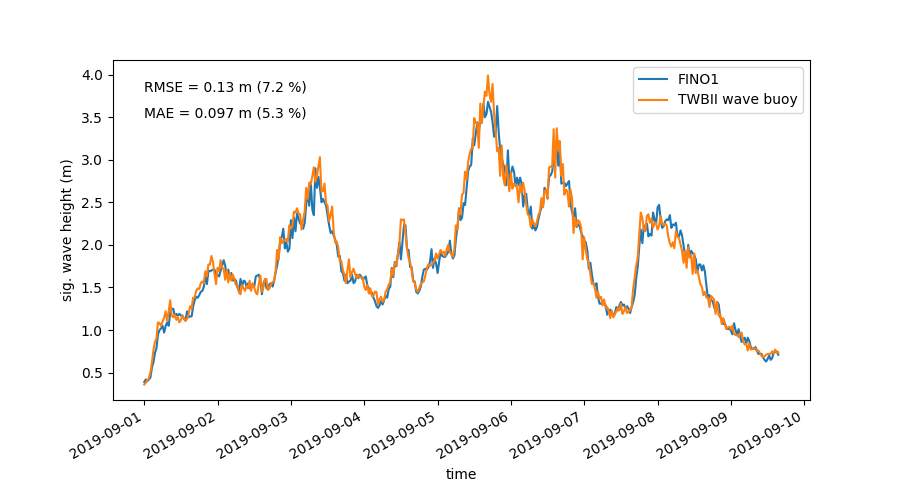

0.09665865384615382
0.13160163518974746
0.052909983288814015
0.0720374228442372


In [46]:
start = pd.to_datetime('2019-09-01 00:00 UTC')
end = pd.to_datetime('2019-09-09 15:59 UTC')

plt.figure(figsize=(9,5))

waves.wave_significant_height[start:end].plot(label='FINO1')
plt.ylabel('sig. wave height (m)')
bw77_waves.Hm0[start:end].plot(label='TWBII wave buoy')
plt.legend()

mean_absolute_error = np.mean(np.abs(waves.wave_significant_height[start:end].resample('30min').mean() - 
                                     bw77_waves.Hm0[start:end].resample('30min').mean()))
root_mean_square_error = np.sqrt(
    np.mean(
        np.power(
            (waves.wave_significant_height[start:end].resample('30min').mean() - 
             bw77_waves.Hm0[start:end].resample('30min').mean()), 2)))

print(mean_absolute_error)
print(root_mean_square_error)

print(mean_absolute_error/waves.wave_significant_height[start:end].mean())
print(root_mean_square_error/waves.wave_significant_height[start:end].mean())


plt.text(x=start,y=3.8,s='RMSE = {:1.2} m ({:1.2} %)'.format(root_mean_square_error,
                                                     100*root_mean_square_error/waves.wave_significant_height[start:end].mean()
                                                    ))
plt.text(x=start,y=3.5,s='MAE = {:1.2} m ({:1.2} %)'.format(mean_absolute_error,
                                                            100*mean_absolute_error/waves.wave_significant_height[start:end].mean()
                                                            
                                                           ))
plt.savefig('turbine_04_significant_wave_height_comparison.png', dpi=150)

# mean absolute error: np.mean(np.abs(x - y))
# ax2 = plt.gca().twinx()
# ax2.plot(np.mean())

<IPython.core.display.Javascript object>


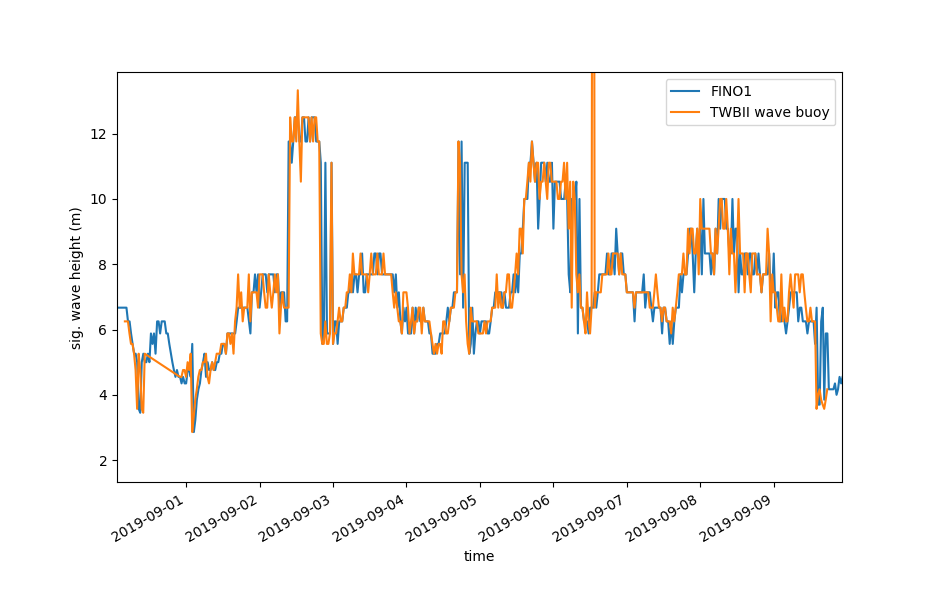

In [11]:
plt.figure()
waves.wave_peak_period.plot(label='FINO1')
plt.ylabel('sig. wave height (m)')
bw77_waves.Tp.plot(label='TWBII wave buoy')
plt.legend()